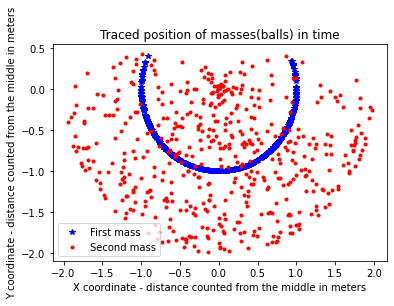

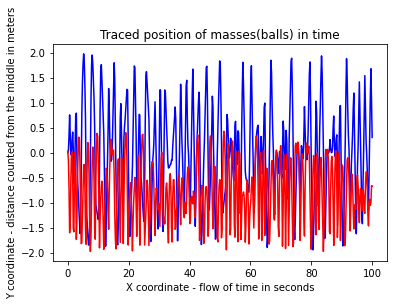

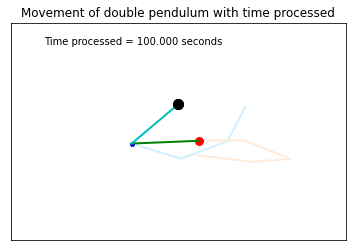

In [2]:
from __future__ import print_function
from scipy.integrate import odeint
import numpy as np
import pylab as py
from matplotlib import animation
from matplotlib import pyplot as plt

m1, m2, L1, L2, u0 = 1, 1, 1, 1, [-np.pi / 2.2, 0, np.pi / 1.8, 0]
g = 9.81
time = np.linspace(0, 100.0, 500)


def pendulum_equations(u, t, m1, m2, L1, L2, g):
    res = np.zeros(4)
    cosfun = np.cos(u[0] - u[2])
    sinfun = np.sin(u[0] - u[2])

    res[0] = u[1]
    res[1] = (m2 * g * np.sin(u[2]) * cosfun - m2 * sinfun * (L1 * cosfun * u[1] ** 2 + L2 * u[3] ** 2) - (m1 + m2) * g * np.sin(
        u[0])) / (L1 * (m1 + m2 * sinfun ** 2))
    res[2] = u[3]
    res[3] = ((m1 + m2) * (L1 * u[1] ** 2 * sinfun - g * np.sin(u[2]) + g * np.sin(u[0]) * cosfun) + m2 * L2 * u[
        3] ** 2 * sinfun * cosfun) / (L2 * (m1 + m2 * sinfun ** 2))

    return res


solvedequations = odeint(pendulum_equations, u0, time, args=(m1, m2, L1, L2, g))
u0, u1, u2, u3 = solvedequations[:, 0], solvedequations[:, 1], solvedequations[:, 2], solvedequations[:, 3]
a, b = L1 * np.sin(u0), -L1 * np.cos(u0)
c, d = a + L2 * np.sin(u2), b - L2 * np.cos(u2)


py.close('all')
py.figure(1)
py.plot(a, b, '*', color='b', label='First mass')
py.plot(c, d, '.', color='r', label='Second mass')
py.legend()
py.title('Traced position of masses(balls) in time')
py.xlabel('X coordinate - distance counted from the middle in meters')
py.ylabel('Y coordinate - distance counted from the middle in meters')

py.figure(2)
py.title('Traced position of masses(balls) in time')
py.xlabel('X coordinate - flow of time in seconds')
py.ylabel('Y coordinate - distance counted from the middle in meters')
py.plot(time, c, color='b', label='First mass')
py.plot(time, d, color='r', label='Second mass')


figure = plt.figure()
ax = plt.axes(xlim=(-L1 - L2 - 0.5, L1 + L2 + 0.5), ylim=(-2.5, 1.5))
first, = ax.plot([], [], 'o-', color='#d2eeff', markersize=6, markerfacecolor='b', lw=2, markevery=10000,markeredgecolor='w')
second, = ax.plot([], [], 'o-', color='#ffebd8', markersize=10, markerfacecolor='r', lw=2, markevery=10000,markeredgecolor='w')
third, = ax.plot([], [], color='g', linestyle='-', linewidth=2)
fourth, = ax.plot([], [], color='c', linestyle='-', linewidth=2)
fifth, = ax.plot([], [], 'o', color='k', markersize=10)
time_template = 'Time processed = %.3f seconds'
time_string = ax.text(0.1, 0.9, '', transform=ax.transAxes)

plt.title('Movement of double pendulum with time processed')

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])


def init():
    first.set_data([], [])
    second.set_data([], [])
    third.set_data([], [])
    fourth.set_data([], [])
    fifth.set_data([], [])
    time_string.set_text('')

    return third, fourth, fifth, first, second, time_string


def animate(i):
    inner = 4
    outer = 5

    diff = time[2] - time[1]
    first.set_data(a[i:max(1, i - inner):-1], b[i:max(1, i - inner):-1])
    second.set_data(c[i:max(1, i - outer):-1], d[i:max(1, i - outer):-1])

    third.set_data([a[i], c[i]], [b[i], d[i]])
    fourth.set_data([a[i], 0], [b[i], 0])

    fifth.set_data([0, 0], [0, 0])
    time_string.set_text(time_template % (i * diff))
    return third, fourth, fifth, first, second, time_string


anim = animation.FuncAnimation(figure, animate, init_func=init, frames=500, interval=1000 * (time[2] - time[1]) * 0.8, blit=True)
anim.save('result.gif', fps=1.0 / (time[2] - time[1]), writer='pillow')
plt.show()


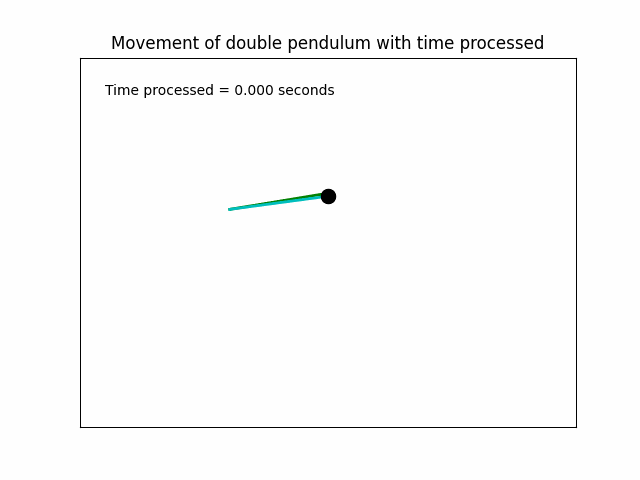